In [1]:
# from importlib import reload

import sys, os
import re

import pandas as pd
import numpy as np
#---------------------------------------------------------------------
import tensorflow as tf

# from alibi_detect.od import OutlierProphet
# from alibi_detect.utils.fetching import fetch_detector
# from alibi_detect.utils.saving import save_detector, load_detector

# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)
from fbprophet import Prophet

from sklearn.metrics import mean_absolute_error, mean_squared_error
#---------------------------------------------------------------------
import matplotlib as mpl
import matplotlib.pyplot as plt

Prophet 0.7.1


In [2]:
file_path = r'C:\Users\s346557\Documents\capital_data.csv'

In [3]:
capital_df = pd.read_csv(file_path)
capital_df['dt'] = pd.to_datetime(capital_df['dt'])
capital_df=capital_df.sort_values(by=['dt'])

In [4]:
capital_df

,department,dt,year,month,control,actuals,control_cum,actuals_cum,residual,residual_cum,residual_percent,residual_cum_percent,control_total,control_percent,control_percent_cum,pred
0,Rollup,2013-01-01,2013,1,253373208.0,179317321.0,2.533732e+08,1.793173e+08,-74055887.0,-74055887.0,0.707720,0.707720,3.284672e+09,0.054592,0.054592,NaN
1,Rollup,2013-02-01,2013,2,271667179.0,228602664.0,5.250404e+08,4.079200e+08,-43064515.0,-117120402.0,0.841481,0.776931,3.284672e+09,0.069597,0.124189,NaN
2,Rollup,2013-03-01,2013,3,308491722.0,229634922.0,8.335321e+08,6.375549e+08,-78856800.0,-195977202.0,0.744380,0.764883,3.284672e+09,0.069911,0.194100,NaN
3,Rollup,2013-04-01,2013,4,291697958.0,246656992.0,1.125230e+09,8.842119e+08,-45040966.0,-241018168.0,0.845590,0.785805,3.284672e+09,0.075093,0.269193,NaN
4,Rollup,2013-05-01,2013,5,269456936.0,227870055.0,1.394687e+09,1.112082e+09,-41586881.0,-282605049.0,0.845664,0.797370,3.284672e+09,0.069374,0.338567,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Rollup,2022-08-01,2022,8,418391282.0,NaN,3.333607e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,3.982905e+08
116,Rollup,2022-09-01,2022,9,409031694.0,NaN,3.742639e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,3.911555e+08
117,Rollup,2022-10-01,2022,10,489601929.0,NaN,4.232241e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,4.938187e+08
118,Rollup,2022-11-01,2022,11,489233391.0,NaN,4.721474e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,5.565062e+08


<AxesSubplot:>

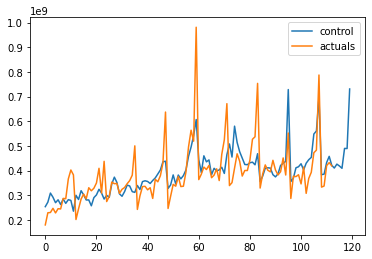

In [5]:
capital_df[['control','actuals']].plot()

<AxesSubplot:>

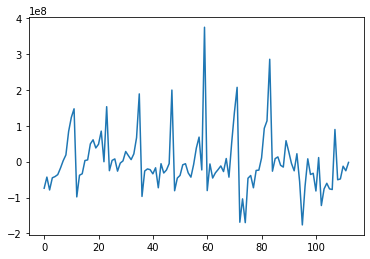

In [6]:
capital_df['residual'].plot()

<AxesSubplot:>

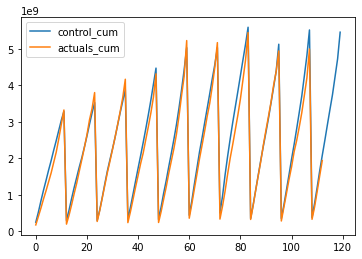

In [7]:
capital_df[['control_cum','actuals_cum']].plot()

<AxesSubplot:>

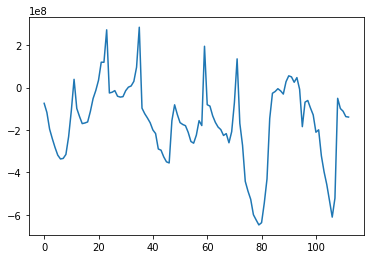

In [8]:
capital_df['residual_cum'].plot()

<AxesSubplot:>

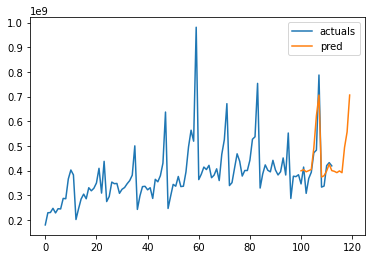

In [9]:
capital_df[['actuals', 'pred']].plot()

In [10]:
capital_df[capital_df['pred'].notna()]

,department,dt,year,month,control,actuals,control_cum,actuals_cum,residual,residual_cum,residual_percent,residual_cum_percent,control_total,control_percent,control_percent_cum,pred
100,Rollup,2021-05-01,2021,5,427451837.0,345692658.0,1.978009e+09,1.767423e+09,-81759179.0,-210586704.0,0.808729,0.893536,5.513523e+09,0.062699,0.320561,3.989080e+08
101,Rollup,2021-06-01,2021,6,402608174.0,413979090.0,2.380618e+09,2.181402e+09,11370916.0,-199215788.0,1.028243,0.916318,5.513523e+09,0.075084,0.395646,4.033521e+08
102,Rollup,2021-07-01,2021,7,429610568.0,307358625.0,2.810228e+09,2.488760e+09,-122251943.0,-321467731.0,0.715435,0.885608,5.513523e+09,0.055746,0.451392,3.948896e+08
103,Rollup,2021-08-01,2021,8,443775960.0,367791267.0,3.254004e+09,2.856552e+09,-75984693.0,-397452424.0,0.828777,0.877857,5.513523e+09,0.066707,0.518099,3.995494e+08
104,Rollup,2021-09-01,2021,9,453254682.0,392945932.0,3.707259e+09,3.249498e+09,-60308750.0,-457761174.0,0.866943,0.876523,5.513523e+09,0.071269,0.589369,4.040091e+08
105,Rollup,2021-10-01,2021,10,547984212.0,472063889.0,4.255243e+09,3.721562e+09,-75920323.0,-533681497.0,0.861455,0.874583,5.513523e+09,0.085619,0.674988,4.925802e+08
106,Rollup,2021-11-01,2021,11,560395060.0,482759374.0,4.815638e+09,4.204321e+09,-77635686.0,-611317183.0,0.861463,0.873056,5.513523e+09,0.087559,0.762547,6.219535e+08
107,Rollup,2021-12-01,2021,12,697885302.0,787439431.0,5.513523e+09,4.991760e+09,89554129.0,-521763054.0,1.128322,0.905367,5.513523e+09,0.142820,0.905367,7.061567e+08
108,Rollup,2022-01-01,2022,1,383151158.0,332693053.0,3.831512e+08,3.326931e+08,-50458105.0,-50458105.0,0.868308,0.868308,5.452230e+09,0.061020,0.061020,3.735670e+08
109,Rollup,2022-02-01,2022,2,385165447.0,336952194.0,7.683166e+08,6.696452e+08,-48213253.0,-98671358.0,0.874825,0.871575,5.452230e+09,0.061801,0.122820,3.789686e+08


In [11]:
tmp = capital_df[(capital_df['pred'].notna()) & (capital_df['actuals'].notna())]

In [12]:
mae = mean_absolute_error(tmp['actuals'], tmp['pred'])
mse = mean_squared_error(tmp['actuals'], tmp['pred'])
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)

MAE: 43484463.550
MSE: 3265647562694517.500


In [13]:
capital_df

,department,dt,year,month,control,actuals,control_cum,actuals_cum,residual,residual_cum,residual_percent,residual_cum_percent,control_total,control_percent,control_percent_cum,pred
0,Rollup,2013-01-01,2013,1,253373208.0,179317321.0,2.533732e+08,1.793173e+08,-74055887.0,-74055887.0,0.707720,0.707720,3.284672e+09,0.054592,0.054592,NaN
1,Rollup,2013-02-01,2013,2,271667179.0,228602664.0,5.250404e+08,4.079200e+08,-43064515.0,-117120402.0,0.841481,0.776931,3.284672e+09,0.069597,0.124189,NaN
2,Rollup,2013-03-01,2013,3,308491722.0,229634922.0,8.335321e+08,6.375549e+08,-78856800.0,-195977202.0,0.744380,0.764883,3.284672e+09,0.069911,0.194100,NaN
3,Rollup,2013-04-01,2013,4,291697958.0,246656992.0,1.125230e+09,8.842119e+08,-45040966.0,-241018168.0,0.845590,0.785805,3.284672e+09,0.075093,0.269193,NaN
4,Rollup,2013-05-01,2013,5,269456936.0,227870055.0,1.394687e+09,1.112082e+09,-41586881.0,-282605049.0,0.845664,0.797370,3.284672e+09,0.069374,0.338567,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Rollup,2022-08-01,2022,8,418391282.0,NaN,3.333607e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,3.982905e+08
116,Rollup,2022-09-01,2022,9,409031694.0,NaN,3.742639e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,3.911555e+08
117,Rollup,2022-10-01,2022,10,489601929.0,NaN,4.232241e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,4.938187e+08
118,Rollup,2022-11-01,2022,11,489233391.0,NaN,4.721474e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,5.565062e+08


In [14]:
df = capital_df[['dt','actuals', 'control']].copy()
df = df.rename(columns={'dt':'ds', 'actuals':'y'})
#-------------------------
#train_test_split_date = '2021'
train_test_split_date = '2021-05-01'
df_train = df[df['ds']<train_test_split_date].copy()
df_test  = df[df['ds']>=train_test_split_date].copy()
#-------------------------
model = Prophet()
model.add_regressor('control')
model.fit(df_train)
#-------------------------
forecast = model.predict(df_test)
#-------------------------
y_true = df_test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true[:-7], y_pred[:-7])
mse = mean_squared_error(y_true[:-7], y_pred[:-7])
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 40472628.672
MSE: 2210679603562398.750


In [15]:
a=df_test[df_test['ds'].isin(tmp['dt'])]['y']
b=forecast[forecast['ds'].isin(tmp['dt'])]['yhat']
mae = mean_absolute_error(a,b)
print('MAE: %.3f' % mae)

MAE: 40472628.672


In [16]:
# fig = model.plot_components(forecast)

In [17]:
# fig=model.plot(forecast)

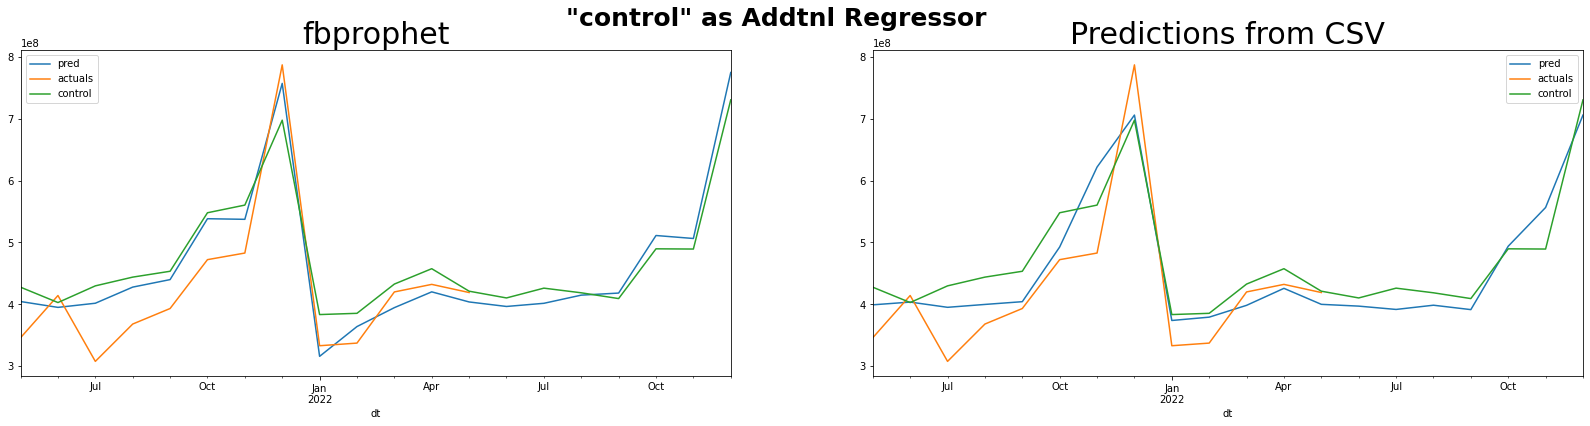

In [18]:
fig, [ax0,ax1] = plt.subplots(1, 2, num=0, figsize=[28, 6])
#-------------------------
forecast.plot(ax=ax0, x='ds', y='yhat', label='pred')
df_test.plot(ax=ax0, x='ds', y='y', label='actuals')
capital_df[capital_df['dt'].isin(forecast['ds'])].plot(ax=ax0, x='dt', y='control', label='control')
ax0.set_title('fbprophet', fontsize=30)
#-------------------------
capital_df[(capital_df['pred'].notna())].plot(ax=ax1, 
                                              x='dt', 
                                              y=['pred', 'actuals', 'control'])
ax1.set_title('Predictions from CSV', fontsize=30)
#-------------------------
fig.suptitle('"control" as Addtnl Regressor', fontsize=25, fontweight='bold');

In [19]:
df = capital_df[['dt','actuals', 'control', 'control_cum', 'control_total']].copy()
df = df.rename(columns={'dt':'ds', 'actuals':'y'})
#-------------------------
#train_test_split_date = '2021'
train_test_split_date = '2021-05-01'
df_train = df[df['ds']<train_test_split_date].copy()
df_test  = df[df['ds']>=train_test_split_date].copy()
#-------------------------
model = Prophet()
# model.add_regressor('control')
# model.add_regressor('control_cum')
# model.add_regressor('control_total')
model.fit(df_train)
#-------------------------
forecast = model.predict(df_test)
#-------------------------
y_true = df_test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true[:-7], y_pred[:-7])
mse = mean_squared_error(y_true[:-7], y_pred[:-7])
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 37047841.199
MSE: 2510359190399043.500


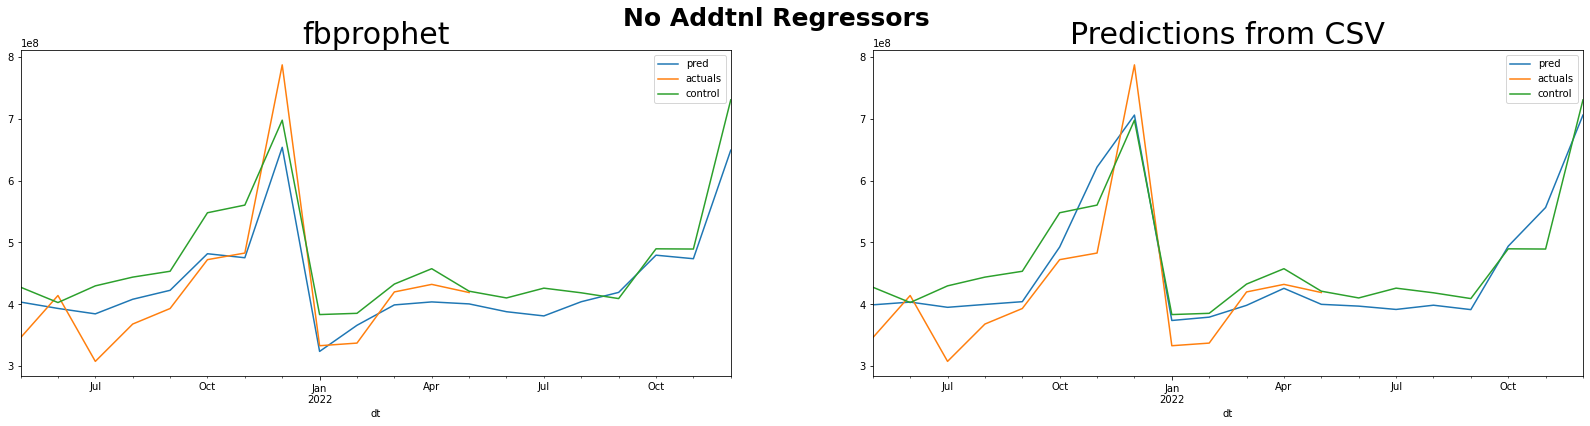

In [20]:
fig, [ax0,ax1] = plt.subplots(1, 2, num=0, figsize=[28, 6])
#-------------------------
forecast.plot(ax=ax0, x='ds', y='yhat', label='pred')
df_test.plot(ax=ax0, x='ds', y='y', label='actuals')
capital_df[capital_df['dt'].isin(forecast['ds'])].plot(ax=ax0, x='dt', y='control', label='control')
ax0.set_title('fbprophet', fontsize=30)
#-------------------------
capital_df[(capital_df['pred'].notna())].plot(ax=ax1, 
                                              x='dt', 
                                              y=['pred', 'actuals', 'control'])
ax1.set_title('Predictions from CSV', fontsize=30)
#-------------------------
fig.suptitle('No Addtnl Regressors', fontsize=25, fontweight='bold');

In [21]:
capital_df.tail()

,department,dt,year,month,control,actuals,control_cum,actuals_cum,residual,residual_cum,residual_percent,residual_cum_percent,control_total,control_percent,control_percent_cum,pred
115,Rollup,2022-08-01,2022,8,418391282.0,NaN,3.333607e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,3.982905e+08
116,Rollup,2022-09-01,2022,9,409031694.0,NaN,3.742639e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,3.911555e+08
117,Rollup,2022-10-01,2022,10,489601929.0,NaN,4.232241e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,4.938187e+08
118,Rollup,2022-11-01,2022,11,489233391.0,NaN,4.721474e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,5.565062e+08
119,Rollup,2022-12-01,2022,12,730756300.0,NaN,5.452230e+09,NaN,NaN,NaN,NaN,NaN,5.452230e+09,NaN,NaN,7.061567e+08


In [22]:
capital_df.isna().sum(axis=0)

department                0
dt                        0
year                      0
month                     0
control                   0
actuals                   7
control_cum               0
actuals_cum               7
residual                  7
residual_cum              7
residual_percent          7
residual_cum_percent      7
control_total             0
control_percent           7
control_percent_cum       7
pred                    100
dtype: int64

In [23]:
capital_df[capital_df.drop(columns=['pred']).isna().sum(axis=1)==0]

,department,dt,year,month,control,actuals,control_cum,actuals_cum,residual,residual_cum,residual_percent,residual_cum_percent,control_total,control_percent,control_percent_cum,pred
0,Rollup,2013-01-01,2013,1,253373208.0,179317321.0,2.533732e+08,1.793173e+08,-74055887.0,-74055887.0,0.707720,0.707720,3.284672e+09,0.054592,0.054592,NaN
1,Rollup,2013-02-01,2013,2,271667179.0,228602664.0,5.250404e+08,4.079200e+08,-43064515.0,-117120402.0,0.841481,0.776931,3.284672e+09,0.069597,0.124189,NaN
2,Rollup,2013-03-01,2013,3,308491722.0,229634922.0,8.335321e+08,6.375549e+08,-78856800.0,-195977202.0,0.744380,0.764883,3.284672e+09,0.069911,0.194100,NaN
3,Rollup,2013-04-01,2013,4,291697958.0,246656992.0,1.125230e+09,8.842119e+08,-45040966.0,-241018168.0,0.845590,0.785805,3.284672e+09,0.075093,0.269193,NaN
4,Rollup,2013-05-01,2013,5,269456936.0,227870055.0,1.394687e+09,1.112082e+09,-41586881.0,-282605049.0,0.845664,0.797370,3.284672e+09,0.069374,0.338567,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Rollup,2022-01-01,2022,1,383151158.0,332693053.0,3.831512e+08,3.326931e+08,-50458105.0,-50458105.0,0.868308,0.868308,5.452230e+09,0.061020,0.061020,3.735670e+08
109,Rollup,2022-02-01,2022,2,385165447.0,336952194.0,7.683166e+08,6.696452e+08,-48213253.0,-98671358.0,0.874825,0.871575,5.452230e+09,0.061801,0.122820,3.789686e+08
110,Rollup,2022-03-01,2022,3,432522409.0,419785122.0,1.200839e+09,1.089430e+09,-12737287.0,-111408645.0,0.970551,0.907224,5.452230e+09,0.076993,0.199814,3.980956e+08
111,Rollup,2022-04-01,2022,4,457406286.0,432021810.0,1.658245e+09,1.521452e+09,-25384476.0,-136793121.0,0.944503,0.917507,5.452230e+09,0.079238,0.279051,4.256119e+08


In [24]:
# df = capital_df[['dt','actuals', 'actuals_cum', 'control_cum']].copy()
# df = df.rename(columns={'dt':'ds', 'actuals':'y'})
# #-------------------------
# df_train = df[df['ds']<'2021'].copy()
# df_test  = df[df['ds']>='2021'].copy()
# #-------------------------
# model = Prophet()
# model.add_regressor('actuals_cum')
# model.add_regressor('control_cum')
# model.fit(df_train)
# #-------------------------
# forecast = model.predict(df_test)
# #-------------------------
# y_true = df_test['y'].values
# y_pred = forecast['yhat'].values
# mae = mean_absolute_error(y_true[:-7], y_pred[:-7])
# print('MAE: %.3f' % mae)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ValueError: Found NaN in column 'actuals_cum'